<a href="https://colab.research.google.com/github/christinaxliu/research/blob/main/JPL-Caltech/HZExoplanetsExploration/StarMassVsPlanetOrbit/HZ_StarMassVsPlanetOrbit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import division

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#from matplotlib.patches import Ellipse
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
pd.options.mode.copy_on_write = True

In [77]:
# Constants and methods for plotting graphs

# Mapping from exoplanet type to the corresponding color in the plotting graph
exoplanet_type_colors = {
    'Gas-Giants': 'wheat',
    'Super-Earths': 'salmon',
    'Neptunian-Planets': 'lightsteelblue',
    'Terrestrial-Planets': 'cyan'
}

# Mapping from exoplanet type to the corresponding legend title in the plotting graph
exoplanet_type_labels = {
    'Gas-Giants': 'Gas Giants (size of Saturn or larger, 1,197 in total)',
    'Super-Earths': 'Super Earths (larger than Earth and smaller than Neptune, 2,942 in total)',
    'Neptunian-Planets': 'Neptunian Planets (Neptune sized and smaller than Saturn, 378 in total)',
    'Terrestrial-Planets': 'Terrestrial Planets (Earth sized or smaller, 185 in total)'
}

exoplanet_type_colors_with_earth = {
    'Gas-Giants': 'wheat',
    'Super-Earths': 'salmon',
    'Neptunian-Planets': 'lightsteelblue',
    'Terrestrial-Planets': 'cyan',
    'Earth': 'royalblue'
}

exoplanet_type_labels_with_earth = {
    'Gas-Giants': 'Gas Giants (size of Saturn or larger)',
    'Super-Earths': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Neptunian-Planets': 'Neptunian Planets (Neptune sized, smaller than Saturn)',
    'Terrestrial-Planets': 'Terrestrial Planets (Earth sized or smaller)',
    'Earth': 'Earth'
}


exoplanet_discover_method_markers = {
    'Transit': 's',
    'Radial Velocity': 'h',
    'Microlensing': '^',
    'Imaging': 'X',
    'Timing': '*'
}

exoplanet_discover_method_colors = {
    'Transit': 'violet',
    'Radial Velocity': 'gainsboro',
    'Microlensing': 'cyan',
    'Imaging': 'gold',
    'Timing': 'tomato'
}

exoplanet_discover_method_labels = {
    'Transit': 'Transit (4,050 in total)',
    'Radial Velocity': 'Radial Velocity (1,040 in total)',
    'Microlensing': 'Microlensing (222 intotal)',
    'Imaging': 'Direct Imaging (73 in total)',
    'Timing': 'Timing (42 in total)'
}

solar_system_planets_colors = {
    'Mercury': 'gray',
    'Venus': 'goldenrod',
    'Earth': 'dodgerblue',
    'Mars': 'orangered',
    'Jupiter': 'chocolate',
    'Saturn': 'goldenrod',
    'Uranus': 'powderblue',
    'Neptune': 'deepskyblue'
}

solar_system_planets_labels = {
    'Mercury': 'Mercury',
    'Venus': 'Venus',
    'Earth': 'Earth',
    'Mars': 'Mars',
    'Jupiter': 'Jupiter',
    'Saturn': 'Saturn',
    'Uranus': 'Uranus',
    'Neptune': 'Neptune'
}

exoplanet_type_colors_with_solar_system_planets = {
    'Gas-Giants': 'wheat',
    'Super-Earths': 'salmon',
    'Neptunian-Planets': 'lightsteelblue',
    'Terrestrial-Planets': 'cyan',
    'Mercury': 'gray',
    'Venus': 'goldenrod',
    'Earth': 'royalblue',
    'Mars': 'orangered',
    'Jupiter': 'peru',
    'Saturn': 'gold',
    'Uranus': 'powderblue',
    'Neptune': 'deepskyblue'
}

exoplanet_type_labels_with_solar_system_planets = {
    'Gas-Giants': 'Gas Giants (size of Saturn or larger)',
    'Super-Earths': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Neptunian-Planets': 'Neptunian Planets (Neptune sized, smaller than Saturn)',
    'Terrestrial-Planets': 'Terrestrial Planets (Earth sized or smaller)',
    'Mercury': 'Mercury',
    'Venus': 'Venus',
    'Earth': 'Earth',
    'Mars': 'Mars',
    'Jupiter': 'Jupiter',
    'Saturn': 'Saturn',
    'Uranus': 'Uranus',
    'Neptune': 'Neptune'
}

exoplanet_type_with_hz_colors = {
    'Gas-Giants': 'wheat',
    'Super-Earths': 'salmon',
    'Neptunian-Planets': 'lightsteelblue',
    'Terrestrial-Planets': 'cyan',
    'HabitableZone-Planets': 'lime'
}

exoplanet_type_with_hz_labels = {
    'Gas-Giants': 'Gas Giants (size of Saturn or larger)',
    'Super-Earths': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Neptunian-Planets': 'Neptunian Planets (Neptune sized, smaller than Saturn)',
    'Terrestrial-Planets': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)'
}

exoplanet_type_with_hz_colors_with_earth = {
    'Gas-Giants': 'wheat',
    'Super-Earths': 'salmon',
    'Neptunian-Planets': 'lightsteelblue',
    'Terrestrial-Planets': 'cyan',
    'HabitableZone-Planets': 'lime',
    'Earth': 'lime'
}

exoplanet_type_with_hz_labels_with_earth = {
    'Gas-Giants': 'Gas Giants (size of Saturn or larger)',
    'Super-Earths': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Neptunian-Planets': 'Neptunian Planets (Neptune sized, smaller than Saturn)',
    'Terrestrial-Planets': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)',
    'Earth': 'Earth'
}

exoplanet_type_with_hz_zone_inner_colors = {
    'Gas-Giants': 'red',
    'Super-Earths': 'red',
    'Neptunian-Planets': 'red',
    'Terrestrial-Planets': 'red',
    'HabitableZone-Planets': 'red'
}

exoplanet_type_with_hz_zone_inner_labels = {
    'Gas-Giants': 'Gas Giants (size of Saturn or larger)',
    'Super-Earths': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Neptunian-Planets': 'Neptunian Planets (Neptune sized, smaller than Saturn)',
    'Terrestrial-Planets': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)'
}

exoplanet_type_with_hz_zone_outer_colors = {
    'Gas-Giants': 'blue',
    'Super-Earths': 'blue',
    'Neptunian-Planets': 'blue',
    'Terrestrial-Planets': 'blue',
    'HabitableZone-Planets': 'blue'
}

exoplanet_type_with_hz_zone_outer_labels = {
    'Gas-Giants': 'Gas Giants (size of Saturn or larger)',
    'Super-Earths': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Neptunian-Planets': 'Neptunian Planets (Neptune sized, smaller than Saturn)',
    'Terrestrial-Planets': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)'
}

# Plot selected exoplanets with sizeable circles in proportion to the exoplanets' radii
def plot_selected_exoplanets_with_size_and_label(ax,
                                                 exoplanets_data,
                                                 x_field,
                                                 y_field,
                                                 size_field,
                                                 is_selected,
                                                 marker,
                                                 color,
                                                 edgecolors,
                                                 label,
                                                 scale_size):
    x = exoplanets_data[x_field][is_selected]
    y = exoplanets_data[y_field][is_selected]
    size = exoplanets_data[size_field][is_selected] * scale_size

    ax.scatter(x=x,
               y=y,
               c=color,
               marker=marker,
               s=size,
               edgecolors=edgecolors,
               label=label)

def plot_exoplanets_with_size_and_label(ax,
                                        exoplanets_data,
                                        x_field,
                                        y_field,
                                        size_field,
                                        type_field,
                                        discover_method_field,
                                        scale_size,
                                        edgecolors,
                                        exoplanet_discover_method_marker_map,
                                        exoplanet_discover_method_color_map,
                                        exoplanet_discover_method_label_map):
    #for exoplanet_type in exoplanet_type_labels:
    for exoplanet_discover_method in exoplanet_discover_method_label_map:
            plot_selected_exoplanets_with_size_and_label(ax=ax,
                                                         exoplanets_data=exoplanets_data,
                                                         x_field=x_field,
                                                         y_field=y_field,
                                                         size_field=size_field,
                                                         is_selected=exoplanets_data[discover_method_field].map(lambda x: x == exoplanet_discover_method),
                                                         marker=exoplanet_discover_method_marker_map[exoplanet_discover_method],
                                                         color=exoplanet_discover_method_color_map[exoplanet_discover_method],
                                                         edgecolors=edgecolors,
                                                         label=exoplanet_discover_method_label_map[exoplanet_discover_method],
                                                         scale_size=scale_size)

def plot_selected_exoplanets_with_size(ax, #axes object for plotting graph
                                  exoplanets_data, # DataFrame object that contains exoplanet data
                                  x_field, # Data field for x axis
                                  y_field, # Data field for y axis
                                  size_field, # Data field for the star size
                                  is_selected, # Whether the current data entry is selected or not
                                  color, # Color for the data points in the graph
                                  edgecolors, # Edge color for the data points in the graph
                                  scale_size, # Scale proportion for circle representing star in graph
                                  linewidths=None
                                  ):
    x = exoplanets_data[x_field][is_selected]
    y = exoplanets_data[y_field][is_selected]
    size = exoplanets_data[size_field][is_selected] * scale_size

    ax.scatter(x=x,
               y=y,
               c=color,
               s=size,
               edgecolors=edgecolors,
               linewidths=linewidths)

def plot_exoplanets_with_size_only(ax,
                                   exoplanets_data,
                                   x_field,
                                   y_field,
                                   size_field,
                                   type_field,
                                   scale_size,
                                   edgecolors,
                                   linewidths,
                                   exoplanet_color_map,
                                   exoplanet_label_map):
    #for exoplanet_type in exoplanet_type_labels:
    for exoplanet_type in exoplanet_label_map:
        plot_selected_exoplanets_with_size(ax=ax,
                                           exoplanets_data=exoplanets_data,
                                           x_field=x_field,
                                           y_field=y_field,
                                           size_field=size_field,
                                           is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                           color=exoplanet_color_map[exoplanet_type],
                                           edgecolors=edgecolors,
                                           scale_size=scale_size,
                                           linewidths=linewidths)

def plot_selected_exoplanet_hz_zones(ax,
                                     exoplanets_data,
                                     x_field,
                                     y_field,
                                     #size_field,
                                     is_selected,
                                     color,
                                     edgecolors,
                                     scale_size,
                                     alpha):
    x = exoplanets_data[x_field][is_selected]
    y = exoplanets_data[y_field][is_selected]
    #size = exoplanets_data[size_field][is_selected] * scale_size
    size = scale_size

    ax.scatter(x=x,
               y=y,
               c=color,
               s=size,
               edgecolors=edgecolors,
               alpha=alpha)

def plot_exoplanet_hz_zones(ax,
                            exoplanets_data,
                            x_field,
                            y_field,
                            #size_field,
                            type_field,
                            #hz_status_field,
                            scale_size,
                            alpha,
                            #edgecolors,
                            #linewidths,
                            exoplanet_color_map,
                            exoplanet_label_map):
    #for exoplanet_type in exoplanet_type_labels:
    for exoplanet_type in exoplanet_label_map:
        plot_selected_exoplanet_hz_zones(ax=ax,
                                         exoplanets_data=exoplanets_data,
                                         x_field=x_field,
                                         y_field=y_field,
                                         #size_field=size_field,
                                         is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                         color=exoplanet_color_map[exoplanet_type],
                                         edgecolors=exoplanet_color_map[exoplanet_type],
                                         scale_size=scale_size,
                                         alpha=alpha)

# Set legend with fixed size
def set_legend_size(legend, legend_count, legend_size):
    for i in range (legend_count):
        legend.legend_handles[i]._sizes = [legend_size]

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Exoplanet data from NASA Exoplanet Archive - Planetary Systems Composite Data on September 15th, 2024:
# https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars

exoplanets_filename = '/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/HZExoplanetExploration/StarMassVsPlanetOrbit/PSCompPars_2024.09.15.csv'
exoplanets_data = pd.read_table(exoplanets_filename,
                                skiprows=89,
                                sep=',',
                                header=None,
                                index_col=None,
                                names = ['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'pl_controv_flag',
                                          'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
                                          'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim',
                                          'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
                                          'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
                                          'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
                                          'ttv_flag', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim',
                                          'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim',
                                          'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'rastr', 'ra', 'decstr', 'dec',
                                          'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2',
                                          'sy_gaiamag', 'sy_gaiamagerr1', 'sy_gaiamagerr2'],
                                skipfooter=0,
                                engine='python')

In [6]:
# Sanity check the first several rows of data to ensure data is read correctly
exoplanets_data.head()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,0.06000,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,0.11000,...,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,-0.0073,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,...,-0.0111,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603


In [7]:
# Sanity check the last several rows of data to ensure data is read correctly.
exoplanets_data.tail()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
5751,ups And b,ups And,2,3,Radial Velocity,1996,Lick Observatory,0,4.617033,0.000023,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5752,ups And c,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,241.258000,0.064000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5753,ups And d,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,1276.460000,0.570000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5754,ups Leo b,ups Leo,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,0,385.200000,2.800000,...,-0.89630,4.30490,0.023,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513
5755,xi Aql b,xi Aql,1,1,Radial Velocity,2007,Okayama Astrophysical Observatory,0,136.970000,0.110000,...,-0.55975,4.70964,0.023,-0.023,2.171,0.220,-0.220,4.42501,0.003837,-0.003837


In [8]:
# Get the statistics about the data
exoplanets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5756 entries, 0 to 5755
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          5756 non-null   object 
 1   hostname         5756 non-null   object 
 2   sy_snum          5756 non-null   int64  
 3   sy_pnum          5756 non-null   int64  
 4   discoverymethod  5756 non-null   object 
 5   disc_year        5756 non-null   int64  
 6   disc_facility    5756 non-null   object 
 7   pl_controv_flag  5756 non-null   int64  
 8   pl_orbper        5480 non-null   float64
 9   pl_orbpererr1    4979 non-null   float64
 10  pl_orbpererr2    4979 non-null   float64
 11  pl_orbperlim     5480 non-null   float64
 12  pl_orbsmax       5475 non-null   float64
 13  pl_orbsmaxerr1   2863 non-null   float64
 14  pl_orbsmaxerr2   2863 non-null   float64
 15  pl_orbsmaxlim    5476 non-null   float64
 16  pl_rade          5735 non-null   float64
 17  pl_radeerr1   

In [9]:
# Cast values to corresponding data types
exoplanets_data['pl_name'] = exoplanets_data['pl_name'].astype(str)
exoplanets_data['hostname'] = exoplanets_data['hostname'].astype(str)
pd.to_numeric(exoplanets_data['sy_snum'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_pnum'], errors = "coerce")
exoplanets_data['discoverymethod'] = exoplanets_data['discoverymethod'].astype(str)
pd.to_numeric(exoplanets_data['disc_year'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_controv_flag'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbper'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbpererr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbpererr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbperlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmax'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmaxerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmaxerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmaxlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_rade'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radeerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radeerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radelim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radj'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radjerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radjerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radjlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasse'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasseerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasseerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasselim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassj'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassjerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassjerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassjlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassprov'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccen'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccenerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccenerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccenlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insol'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insolerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insolerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insollim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqt'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqterr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqterr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqtlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['ttv_flag'], errors = "coerce")
exoplanets_data['st_spectype'] = exoplanets_data['st_spectype'].astype(str)
pd.to_numeric(exoplanets_data['st_teff'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_tefferr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_tefferr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_tefflim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_rad'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_raderr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_raderr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_radlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_mass'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_masserr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_masserr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_masslim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_met'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_meterr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_meterr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_metlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_metratio'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_logg'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_loggerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_loggerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_logglim'], errors = "coerce")
exoplanets_data['rastr'] = exoplanets_data['rastr'].astype(str)
pd.to_numeric(exoplanets_data['ra'], errors = "coerce")
exoplanets_data['decstr'] = exoplanets_data['decstr'].astype(str)
pd.to_numeric(exoplanets_data['dec'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_dist'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_disterr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_disterr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_vmag'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_vmagerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_vmagerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_kmag'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_kmagerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_kmagerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_gaiamag'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_gaiamagerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_gaiamagerr2'], errors = "coerce")

,sy_gaiamagerr2
0,-0.003848
1,-0.003903
2,-0.002826
3,-0.000351
4,-0.000603
...,...
5751,-0.008937
5752,-0.008937
5753,-0.008937
5754,-0.008513


In [10]:
# Change any fields with empty spaces to NaN values so we can clean them up later on
exoplanets_data = exoplanets_data.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

<ipython-input-10-2d85f477f97e>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  exoplanets_data = exoplanets_data.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)


In [11]:
exoplanets_data['pl_controv_flag'].value_counts()

,count
pl_controv_flag,
0,5726
1,30


In [12]:
# Only selects exoplanets with pl_controv_flag == 0
exoplanets_data = exoplanets_data.loc[(exoplanets_data['pl_controv_flag'] == 0)]

In [13]:
exoplanets_data['pl_rade'].describe()

,pl_rade
count,5710.000000
mean,5.703711
std,5.240391
min,0.310000
25%,1.795000
50%,2.785500
75%,11.850500
max,33.600000


In [14]:
# Determine exoplanet types based on radius
# Type classification is based on https://science.nasa.gov/exoplanets/planet-types/
exoplanets_data.loc[(np.isnan(exoplanets_data['pl_rade'])), 'pl_type'] = 'N/A'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_rade'])) & (exoplanets_data['pl_rade'] <= 1)), 'pl_type'] = 'Terrestrial-Planets'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_rade'])) & (exoplanets_data['pl_rade'] > 1) & (exoplanets_data['pl_rade'] < 3.86)), 'pl_type'] = 'Super-Earths'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_rade'])) & (exoplanets_data['pl_rade'] >= 3.86) & (exoplanets_data['pl_rade'] < 9.14)), 'pl_type'] = 'Neptunian-Planets'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_rade'])) & (exoplanets_data['pl_rade'] >= 9.14)), 'pl_type'] = 'Gas-Giants'
exoplanets_data['pl_type'].value_counts()

,count
pl_type,
Super-Earths,3325
Gas-Giants,1673
Neptunian-Planets,495
Terrestrial-Planets,217
N/A,16


In [15]:
#
# Solar System Temperatures Reference:
#     https://science.nasa.gov/resource/solar-system-temperatures/
#
# Sun data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html
#
# Mercury data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/mercuryfact.html
#     https://en.wikipedia.org/wiki/Mercury_(planet)
#
# Venus data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/venusfact.html
#     https://en.wikipedia.org/wiki/Venus
#
# Earth data source:
#     Orbital Eccentricity: https://en.wikipedia.org/wiki/Orbital_eccentricity
#
# Mars data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/marsfact.html
#     https://en.wikipedia.org/wiki/Orbit_of_Mars
#
# Jupiter data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html
#     https://en.wikipedia.org/wiki/Jupiter
#
# Saturn data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/saturnfact.html
#     https://en.wikipedia.org/wiki/Saturn
#
# Uranus data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/uranusfact.html
#     https://en.wikipedia.org/wiki/Uranus
#
# Neptune data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/neptunefact.html
#     https://en.wikipedia.org/wiki/Neptune
#

solar_system_planets_facts_data = [['Mercury','Sun',1,8,'',0,'',0,0,0,0,0,0.387,0,0,0,0.383,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'Mercury'],
                                   ['Venus','Sun',1,8,'',0,'',0,0,0,0,0,0.723,0,0,0,0.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'Venus'],
                                   ['Earth','Sun',1,8,'',0,'',0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0167,0,0,0,1,0,0,0,255,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'Earth'],
                                   ['Mars','Sun',1,8,'',0,'',0,0,0,0,0,1.524,0,0,0,0.532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.431,0,0,0,210,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'Mars'],
                                   ['Jupiter','Sun',1,8,'',0,'',0,0,0,0,0,5.204,0,0,0,10.973,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'Jupiter'],
                                   ['Saturn','Sun',1,8,'',0,'',0,0,0,0,0,9.573,0,0,0,9.140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'Saturn'],
                                   ['Uranus','Sun',1,8,'',0,'',0,0,0,0,0,19.165,0,0,0,3.981,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'Uranus'],
                                   ['Neptune','Sun',1,8,'',0,'',0,0,0,0,0,30.178,0,0,0,3.865,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'Neptune']]
solar_system_planets_data_columns = ['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'pl_controv_flag',
                                          'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
                                          'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim',
                                          'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
                                          'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
                                          'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
                                          'ttv_flag', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim',
                                          'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim',
                                          'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'rastr', 'ra', 'decstr', 'dec',
                                          'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2',
                                          'sy_gaiamag', 'sy_gaiamagerr1', 'sy_gaiamagerr2', 'pl_type']
solar_system_planets_data = pd.DataFrame(solar_system_planets_facts_data, columns=solar_system_planets_data_columns)
pd.to_numeric(solar_system_planets_data['pl_rade'], errors = "coerce")
pd.to_numeric(solar_system_planets_data['pl_insol'], errors = "coerce")
pd.to_numeric(solar_system_planets_data['st_teff'], errors = "coerce")
pd.to_numeric(solar_system_planets_data['st_rad'], errors = "coerce")
solar_system_planets_data

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,pl_type
0,Mercury,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,0,Mercury
1,Venus,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,0,Venus
2,Earth,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,0,Earth
3,Mars,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,0,Mars
4,Jupiter,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,0,Jupiter
5,Saturn,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,0,Saturn
6,Uranus,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,0,Uranus
7,Neptune,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,0,Neptune


In [16]:
solar_system_planets_data['pl_orbsmax']

,pl_orbsmax
0,0.387
1,0.723
2,1.000
3,1.524
4,5.204
5,9.573
6,19.165
7,30.178


In [17]:
solar_system_planets_data['pl_rade']

,pl_rade
0,0.383
1,0.950
2,1.000
3,0.532
4,10.973
5,9.140
6,3.981
7,3.865


In [18]:
solar_system_planets_data['st_mass']

,st_mass
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1


In [19]:
st_mass_vs_pl_orbit_plot_data = exoplanets_data.loc[(~np.isnan(exoplanets_data['st_mass']))
                                                    & (~np.isnan(exoplanets_data['pl_orbsmax']))
                                                    & (~np.isnan(exoplanets_data['pl_rade']))]

In [20]:
st_mass_vs_pl_orbit_plot_data.describe()

,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
count,5432.000000,5432.000000,5432.000000,5432.0,5.168000e+03,4.677000e+03,4.677000e+03,5168.000000,5432.000000,2828.000000,...,5306.000000,5201.000000,5193.000000,5187.000000,5207.000000,5177.000000,5166.000000,5151.000000,5149.000000,5149.000000
mean,1.104934,1.756627,2016.267121,0.0,8.273786e+04,1.023244e+05,-2.336765e+04,-0.000580,15.297186,2.366594,...,-62.085700,12.630317,0.100929,-0.102633,10.492327,0.043461,-0.043485,12.343696,0.000603,-0.000603
std,0.346003,1.145811,4.652368,0.0,5.594578e+06,6.872826e+06,1.464411e+06,0.024089,358.346482,98.083250,...,263.033677,3.118320,0.138256,0.210274,3.052730,0.268665,0.274946,3.013647,0.001165,0.001165
min,1.000000,1.000000,1992.000000,0.0,1.797190e-01,0.000000e+00,-1.000000e+08,-1.000000,0.005800,0.000000,...,-2840.000000,0.872000,0.001000,-11.920000,-3.044000,0.011000,-9.995000,2.364310,0.000118,-0.020612
25%,1.000000,1.000000,2014.000000,0.0,4.430016e+00,1.300000e-05,-1.402200e-03,0.000000,0.052775,0.000838,...,-18.266250,10.675000,0.030000,-0.126000,8.416500,0.020000,-0.032000,10.418800,0.000257,-0.000537
50%,1.000000,1.000000,2016.000000,0.0,1.150509e+01,8.335000e-05,-8.500000e-05,0.000000,0.102100,0.002600,...,-4.655250,13.502000,0.080000,-0.080000,11.449000,0.023000,-0.023000,13.278300,0.000364,-0.000364
75%,1.000000,2.000000,2020.000000,0.0,4.180677e+01,1.400000e-03,-1.300000e-05,0.000000,0.294550,0.032000,...,-0.468850,15.024000,0.126000,-0.030000,12.870500,0.032000,-0.020000,14.787850,0.000537,-0.000257
max,4.000000,8.000000,2024.000000,0.0,4.020000e+08,4.700000e+08,0.000000e+00,0.000000,19000.000000,5205.000000,...,-0.000350,44.610000,3.100000,-0.001000,33.110000,9.995000,-0.011000,20.186100,0.020612,-0.000118


In [21]:
st_mass_vs_pl_orbit_plot_data['pl_type'].value_counts()

,count
pl_type,
Super-Earths,3126
Gas-Giants,1630
Neptunian-Planets,468
Terrestrial-Planets,208


In [22]:
st_mass_vs_pl_orbit_plot_data['discoverymethod'].value_counts()

,count
discoverymethod,
Transit,4050
Radial Velocity,1040
Microlensing,222
Imaging,73
Transit Timing Variations,25
Eclipse Timing Variations,10
Pulsar Timing,6
Astrometry,3
Disk Kinematics,1


In [23]:
st_mass_vs_pl_orbit_plot_data.loc[st_mass_vs_pl_orbit_plot_data['discoverymethod'] == 'Transit Timing Variations', 'discoverymethod'] = 'Timing'
st_mass_vs_pl_orbit_plot_data.loc[st_mass_vs_pl_orbit_plot_data['discoverymethod'] == 'Eclipse Timing Variations', 'discoverymethod'] = 'Timing'
st_mass_vs_pl_orbit_plot_data.loc[st_mass_vs_pl_orbit_plot_data['discoverymethod'] == 'Pulsation Timing Variations', 'discoverymethod'] = 'Timing'
st_mass_vs_pl_orbit_plot_data.loc[st_mass_vs_pl_orbit_plot_data['discoverymethod'] == 'Pulsar Timing', 'discoverymethod'] = 'Timing'
st_mass_vs_pl_orbit_plot_data['discoverymethod'].value_counts()

,count
discoverymethod,
Transit,4050
Radial Velocity,1040
Microlensing,222
Imaging,73
Timing,42
Astrometry,3
Disk Kinematics,1
Orbital Brightness Modulation,1


In [24]:
st_mass_vs_pl_orbit_plot_data['st_mass'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,st_mass
count,5432.000000
mean,0.949853
std,0.428081
min,0.010000
25%,0.790000
50%,0.950000
75%,1.090000
90%,1.280000
95%,1.460000
99%,2.070000


In [25]:
st_mass_vs_pl_orbit_plot_data['pl_orbsmax'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,pl_orbsmax
count,5432.000000
mean,15.297186
std,358.346482
min,0.005800
25%,0.052775
50%,0.102100
75%,0.294550
90%,1.900000
95%,3.620200
99%,35.194390


<ipython-input-78-d32ba195520d>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), weight='bold', size=18)
<ipython-input-78-d32ba195520d>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=18)


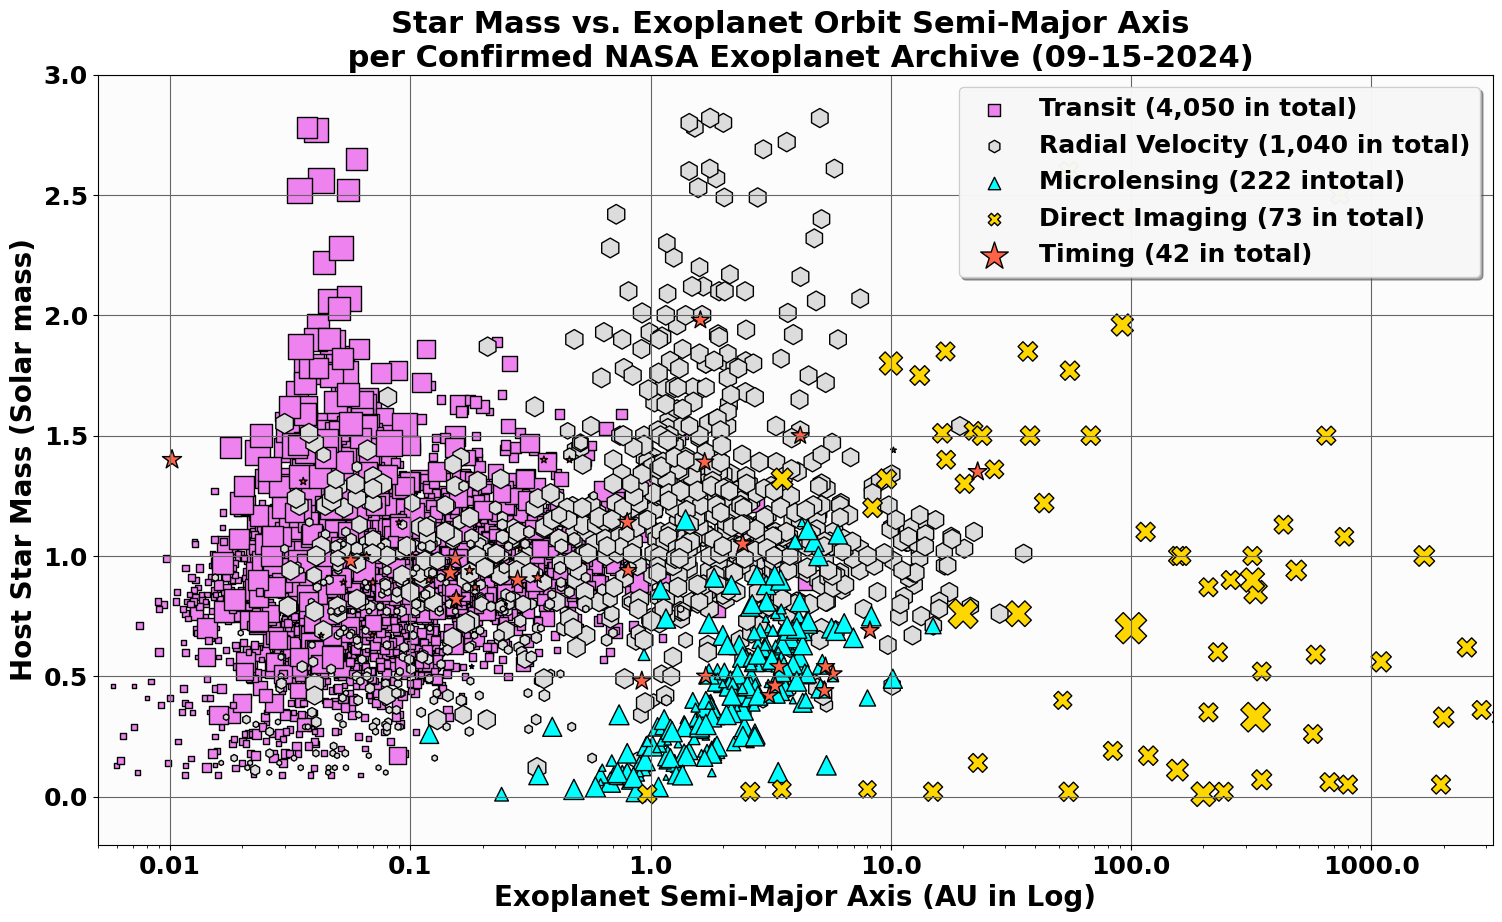

In [78]:
fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111, facecolor='0.99', xscale='log')

ax.set_xlim(0.005, 3200)
ax.set_ylim(-0.2, 3)
ax.grid(color='0.4')
ax.set_title('Star Mass vs. Exoplanet Orbit Semi-Major Axis \n per Confirmed NASA Exoplanet Archive (09-15-2024)', fontweight ='bold')
ax.title.set_fontsize(22)
ax.set_xlabel('Exoplanet Semi-Major Axis (AU in Log)', fontweight ='bold')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Host Star Mass (Solar mass)', fontweight ='bold')
ax.yaxis.label.set_fontsize(20)

# Plot exoplanets
plot_exoplanets_with_size_and_label(ax=ax,
                                    exoplanets_data=st_mass_vs_pl_orbit_plot_data,
                                    x_field='pl_orbsmax',
                                    y_field='st_mass',
                                    size_field='pl_rade',
                                    type_field='pl_type',
                                    discover_method_field='discoverymethod',
                                    scale_size=15,
                                    edgecolors='black',
                                    exoplanet_discover_method_marker_map=exoplanet_discover_method_markers,
                                    exoplanet_discover_method_color_map=exoplanet_discover_method_colors,
                                    exoplanet_discover_method_label_map=exoplanet_discover_method_labels)

ax.set_yticklabels(ax.get_yticks(), weight='bold', size=18)
ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=18)

legend_properties = {'size':18, 'weight':'bold'}
legend = ax.legend(scatterpoints=1,
                   labelcolor='black',
                   loc='best',
                   markerscale=2,
                   shadow=True,
                   framealpha=0.95,
                   prop=legend_properties)
set_legend_size(legend, len(exoplanet_type_labels), 80)

frame = legend.get_frame()
frame.set_facecolor('0.99')

<ipython-input-79-3568fb7d31a3>:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), weight='bold', size=18)
<ipython-input-79-3568fb7d31a3>:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=18)


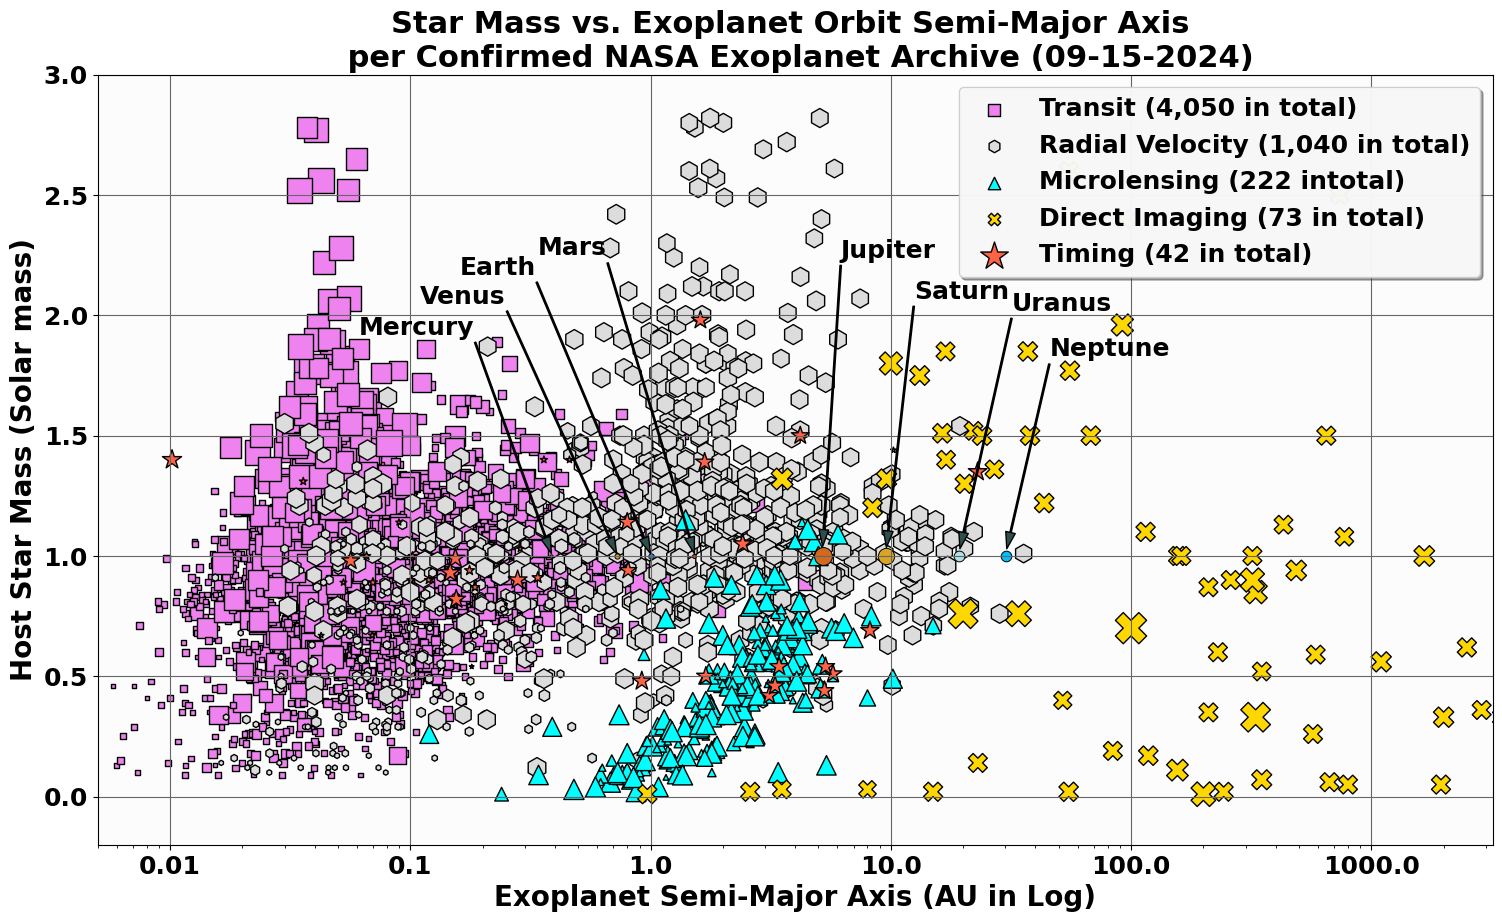

In [79]:
fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111, facecolor='0.99', xscale='log')

ax.set_xlim(0.005, 3200)
ax.set_ylim(-0.2, 3)
ax.grid(color='0.4')
ax.set_title('Star Mass vs. Exoplanet Orbit Semi-Major Axis \n per Confirmed NASA Exoplanet Archive (09-15-2024)', fontweight ='bold')
ax.title.set_fontsize(22)
ax.set_xlabel('Exoplanet Semi-Major Axis (AU in Log)', fontweight ='bold')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Host Star Mass (Solar mass)', fontweight ='bold')
ax.yaxis.label.set_fontsize(20)

# Plot exoplanets
plot_exoplanets_with_size_and_label(ax=ax,
                                    exoplanets_data=st_mass_vs_pl_orbit_plot_data,
                                    x_field='pl_orbsmax',
                                    y_field='st_mass',
                                    size_field='pl_rade',
                                    type_field='pl_type',
                                    discover_method_field='discoverymethod',
                                    scale_size=15,
                                    edgecolors='black',
                                    exoplanet_discover_method_marker_map=exoplanet_discover_method_markers,
                                    exoplanet_discover_method_color_map=exoplanet_discover_method_colors,
                                    exoplanet_discover_method_label_map=exoplanet_discover_method_labels)

# Plot Solar system planets
plot_exoplanets_with_size_only(ax=ax,
                               exoplanets_data=solar_system_planets_data,
                               x_field='pl_orbsmax',
                               y_field='st_mass',
                               size_field='pl_rade',
                               type_field='pl_type',
                               scale_size=15,
                               edgecolors='black',
                               linewidths=0.7,
                               exoplanet_color_map=solar_system_planets_colors,
                               exoplanet_label_map=solar_system_planets_labels)

# Labels for indicating Solar system planets
ax.annotate('Mercury', xy=(0.387, 1.01), xytext=(0.061, 1.92),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Venus', xy=(0.723, 1.01), xytext=(0.11, 2.05),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Earth', xy=(1.0, 1.01), xytext=(0.16, 2.17),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Mars', xy=(1.524, 1.01), xytext=(0.34, 2.25),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Jupiter', xy=(5.209, 1.04), xytext=(6.2, 2.24),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Saturn', xy=(9.59, 1.035), xytext=(12.5, 2.07),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Uranus', xy=(19.4, 1.03), xytext=(32, 2.02),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Neptune', xy=(30.4, 1.03), xytext=(46, 1.83),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.set_yticklabels(ax.get_yticks(), weight='bold', size=18)
ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=18)

legend_properties = {'size':18, 'weight':'bold'}
legend = ax.legend(scatterpoints=1,
                   labelcolor='black',
                   loc='best',
                   markerscale=2,
                   shadow=True,
                   framealpha=0.95,
                   prop=legend_properties)
set_legend_size(legend, len(exoplanet_type_labels), 80)

frame = legend.get_frame()
frame.set_facecolor('0.99')